In [38]:
import pandas as pd
import seaborn as sb

In [39]:
ACC = pd.read_csv("ACC1.csv")

In [40]:
GYR = pd.read_csv("GYR1.csv")

In [41]:
temptime = []
for i in range(len(ACC)):
    temptime.append(int(ACC["time"][i]/100))

In [42]:
ACC['UpdatedTime'] = temptime

In [43]:
ACC = ACC.drop(columns=["time"])

In [44]:
temptime = []
for i in range(len(GYR)):
    temptime.append(int(GYR["time"][i]/100))

In [45]:
GYR['UpdatedTime'] = temptime

In [46]:
GYR = GYR.drop(columns=["time"])

In [47]:
GYR

,x,y,z,UpdatedTime
0,0.007473,0.365672,0.160295,16698096425
1,-0.064972,-0.013190,0.019923,16698096425
2,-0.124063,-0.082707,0.036446,16698096426
3,0.051650,-0.191634,0.043220,16698096426
4,-0.063707,-0.038311,0.077849,16698096427
...,...,...,...,...
5855,0.184560,0.181505,-0.028891,16698099331
5856,0.182949,0.273558,-0.052849,16698099332
5857,0.218065,0.437005,-0.151612,16698099332
5858,-0.476366,0.391010,-0.027793,16698099333


In [48]:
Maindf = pd.merge(ACC, GYR, on='UpdatedTime')

In [49]:
for i in range(len(Maindf)-1):
    if(Maindf.UpdatedTime[i] == Maindf.UpdatedTime[i+1]):
        Maindf = Maindf.drop(labels=[i])

In [51]:
Maindf.index = range(0,len(Maindf),1)

In [52]:
Maindf

,x_x,y_x,z_x,UpdatedTime,x_y,y_y,z_y
0,0.078629,-0.265152,-0.945786,16698096425,-0.064972,-0.013190,0.019923
1,0.084473,-0.258759,-0.940109,16698096426,0.051650,-0.191634,0.043220
2,0.067688,-0.274918,-0.980347,16698096427,-0.094567,-0.107003,-0.009332
3,0.017136,-0.268051,-1.011322,16698096428,-0.204464,0.090220,-0.149987
4,-0.201324,-0.030853,-1.149490,16698096429,-0.355670,0.991871,-0.638818
...,...,...,...,...,...,...,...
2782,0.284393,-0.505325,-0.874969,16698099226,-0.221968,-0.000609,-0.370371
2783,0.279831,-0.376572,-1.018173,16698099227,-0.539344,0.015450,-0.138936
2784,0.291779,-0.184692,-1.095352,16698099228,-0.277669,0.153220,0.026505
2785,0.270050,-0.148026,-0.986832,16698099229,0.322154,0.754917,0.286527


In [66]:
def walk_df(acc,gyr):
    ACC = pd.read_csv(acc)
    GYR = pd.read_csv(gyr)
    ACC = ACC.rename(columns={"x":"accx","y":"accy","z":"accz"})
    GYR = GYR.rename(columns={"x":"gyrx","y":"gyry","z":"gyrz"})
    temptime = []
    for i in range(len(ACC)):
        temptime.append(int(ACC["time"][i]/100))
    ACC['UpdatedTime'] = temptime
    ACC = ACC.drop(columns=["time"])
    temptime = []
    for i in range(len(GYR)):
        temptime.append(int(GYR["time"][i]/100))
    GYR['UpdatedTime'] = temptime
    GYR = GYR.drop(columns=["time"])
    df = pd.merge(ACC, GYR, on='UpdatedTime')
    for i in range(len(df)-1):
        if(df.UpdatedTime[i] == df.UpdatedTime[i+1]):
            df = df.drop(labels=[i])
    return df

In [67]:
df1 = walk_df("ACC1.csv","GYR1.csv")

In [68]:
df2 = walk_df("ACC2.csv","GYR2.csv")

In [69]:
df3 = walk_df("ACC3.csv","GYR3.csv")

In [70]:
df4 = walk_df("ACC4.csv","GYR4.csv")

In [71]:
df5 = walk_df("ACC5.csv","GYR5.csv")

In [72]:
WALKDF = pd.concat([df1,df2,df3,df4,df5,df5])

In [73]:
WALKDF

,accx,accy,accz,UpdatedTime,gyrx,gyry,gyrz
1,0.078629,-0.265152,-0.945786,16698096425,-0.064972,-0.013190,0.019923
3,0.084473,-0.258759,-0.940109,16698096426,0.051650,-0.191634,0.043220
5,0.067688,-0.274918,-0.980347,16698096427,-0.094567,-0.107003,-0.009332
7,0.017136,-0.268051,-1.011322,16698096428,-0.204464,0.090220,-0.149987
9,-0.201324,-0.030853,-1.149490,16698096429,-0.355670,0.991871,-0.638818
...,...,...,...,...,...,...,...
11441,-0.132354,0.538211,0.549622,16698133732,0.306212,0.289438,0.214500
11445,-0.171618,0.423187,0.971586,16698133733,-0.014438,0.347050,0.072738
11449,-0.231685,0.479567,0.768152,16698133734,-0.022962,0.287375,0.053625
11453,-0.303972,0.449389,0.882151,16698133735,-0.494862,0.089237,-0.010312


In [74]:
WALKDF.index = range(0,len(WALKDF),1)

In [81]:
plotwalkdf =  WALKDF.iloc[0:500,:]

<AxesSubplot:xlabel='UpdatedTime', ylabel='accx'>

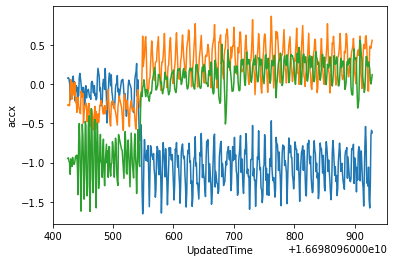

In [82]:
sb.lineplot(y = 'accx', x = 'UpdatedTime', data = plotwalkdf)
sb.lineplot(y = 'accy', x = 'UpdatedTime', data = plotwalkdf)
sb.lineplot(y = 'accz', x = 'UpdatedTime', data = plotwalkdf)

<AxesSubplot:xlabel='UpdatedTime', ylabel='gyrx'>

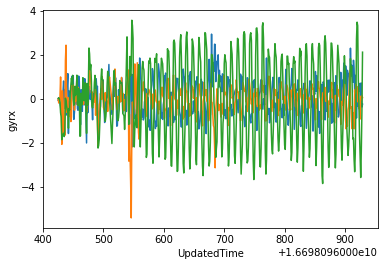

In [83]:
sb.lineplot(y = 'gyrx', x = 'UpdatedTime', data = plotwalkdf)
sb.lineplot(y = 'gyry', x = 'UpdatedTime', data = plotwalkdf)
sb.lineplot(y = 'gyrz', x = 'UpdatedTime', data = plotwalkdf)

In [84]:
Label = []
for i in range(len(WALKDF)):
    Label.append("walking")

In [85]:
WALKDF["Label"] = Label

In [86]:
WALKDF.to_csv("WALK.csv",index=False)